In [2]:
import numpy as np
import copy
from shapely.geometry.polygon import LinearRing, Polygon, LineString
from shapely.geometry.multipolygon import MultiPolygon
from shapely.ops import cascaded_union
from shapely.geometry import Point
import random
from shapely import affinity
import matplotlib.pyplot as plt
import time
from scipy import optimize


In [3]:
# Problems data structures

class Room():
    def __init__(self, shape):
        self.shape = shape
        self.polygon = Polygon(np.array(shape, dtype=np.float64))

class FurnitureItem():
    def __init__(self, unitcost, shape):
        self.shape = shape
        self.unit_cost = unitcost
        self.polygon = Polygon(np.array(shape, dtype=np.float64))
        self.total_cost = np.float64((np.float64(self.unit_cost) * self.polygon.area))
        self.sorting = (self.polygon, self.polygon.area)

class Problem():
    def __init__(self, room, furniture):
        self.room = room
        self.furniture = furniture

In [4]:
# Parsing from problems files input

problems = []
with open('problems.rfp') as f:
    for line in f:
        furnitureList = []
        problem = line.replace(" ","").split("#")

        room_shape = problem[0].split(":")[1]
        furniture = problem[1].split(";")

        room = Room([tuple(np.float64(i) for i in el.strip('()').split(',')) for el in room_shape.split('),(')])

        for furnitureItem in furniture:
            parse_furniture = furnitureItem.strip().split(":")
            unit_cost = parse_furniture[0]
            shape = [tuple(np.float64(i) for i in el.strip('()').split(',')) for el in parse_furniture[1].split('),(')]
            furnitureItem = FurnitureItem(unit_cost, shape)
            furnitureList.append(furnitureItem)
        problems.append(Problem(room,furnitureList))

In [258]:
def random_points_within(poly, num_points):
    min_x, min_y, max_x, max_y = poly.bounds
    points = []
    while len(points) < num_points:
        random_point = Point([random.uniform(min_x, max_x), random.uniform(min_y, max_y)])
        if (random_point.within(poly)):
            points.append(random_point)
    return points

In [259]:
def get_output(solution):
    output = ""
    for x in solution:
        output = output + str(x[:-1]).replace('[','').replace(']','') + "; "
    return output

### Room 11

In [260]:
# Set up specific shapes for map 11

base_room_11 = problems[10].room.polygon
f_items_11_vertices_13 = []

for item in problems[10].furniture:
    x,y = item.polygon.exterior.xy
    if(len(x)==13):
        f_items_11_vertices_13.append(item.polygon)
        
shape1 = Polygon([(-15.08889668642394, 3.9482917599290186), (-15.486653963472579, 4.34108833394011), (-15.409086789277868, 4.578750559561785), (-14.85619516383981, 4.661278436794042), (-15.253952440888451, 5.054075010805132), (-15.176385266693742, 5.291737236426808), (-14.623493641255685, 5.374265113659066), (-15.021250918304325, 5.7670616876701555), (-14.943683744109617, 6.00472391329183), (-14.390792118671559, 6.087251790524089), (-15.263873846963548, 6.635182712924596), (-16.039545588910634, 4.258560456707853)
])
shape2 = Polygon([(-5.6189199596134385, 1.558120177475971), (-5.782104649062396, 2.092789006873615), (-5.60087405519313, 2.2649966485327266), (-5.07522817800564, 2.074743102453306), (-5.238412867454597, 2.609411931850952), (-5.057182273585332, 2.781619573510064), (-4.531536396397843, 2.591366027430643), (-4.6947210858468, 3.1260348568282867), (-4.513490491977533, 3.2982424984873995), (-3.9878446147900437, 3.1079889524079785), (-4.495444587557226, 4.0051189695441565), (-6.307750526249887, 2.2830425529530354)
])
shape3 = Polygon([(6.5503158452884236e-15, -5.773159728050814e-15), (-1.069337658795283, -0.32636937889791806), (-1.413752942113506, 0.0360918088406148), (-1.0332458499546617, 1.0873835632155942), (-2.1025835087499516, 0.7610141843176814), (-2.4469987920681744, 1.1234753720562152), (-2.0664916999093297, 2.1747671264311945), (-3.13582935870462, 1.8483977475332818), (-3.480244642022843, 2.2108589352718147), (-3.099737549863999, 3.262150689646795), (-4.893997584136356, 2.2469507441124357), (-1.4498447509541268, -1.3776611332728972)])

multipolygon = base_room_11.difference(shape1).difference(shape2).difference(shape3)
modified_room_11 = multipolygon[0]

NameError: name 'room_11' is not defined

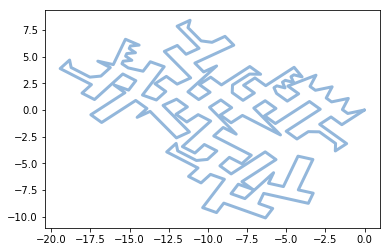

In [261]:
# Algorithm Room 11

# Plotting room
roomX,roomY = problems[10].room.polygon.exterior.xy
plt.plot(roomX, roomY, color='#6699cc', alpha=0.7, linewidth=3, solid_capstyle='round', zorder=2)

solution = []
shapes = copy.copy(problems[10].furniture)
initial_area = room_11.area
updatable_room = modified_room_11
while (updatable_room.area) > initial_area*0.7:
    while(updatable_room.area > 76):
        for j in shapes:
            x,y = j.polygon.exterior.xy
            if len(x) == 4:
                points = random_points_within(updatable_room,1)[0]
                polygon = affinity.translate(j.polygon, points.x, points.y)
                polygon = affinity.rotate(polygon, random.uniform(0,180),origin="centroid")
                if updatable_room.contains(polygon):
                    updatable_room = updatable_room.difference(polygon)
                    x,y = polygon.exterior.xy
                    solution.append(list(zip(*(x,y))))
                    shapes.remove(j)
                    print(len(shapes), (updatable_room.area))
                    
                    plt.plot(x, y, color='#e50000', alpha=0.7, linewidth=3, solid_capstyle='round', zorder=2)
                    display.display(plt.gcf())
                    display.clear_output(wait=True)

    for j in shapes:
            x,y = j.polygon.exterior.xy
            if len(x) == 4 or len(x)==5:
                points = random_points_within(updatable_room,1)[0]
                polygon = affinity.translate(j.polygon, points.x, points.y)
                polygon = affinity.rotate(polygon, random.uniform(0,180),origin="centroid")
                if updatable_room.contains(polygon):
                    updatable_room = updatable_room.difference(polygon)
                    x,y = polygon.exterior.xy
                    solution.append(list(zip(*(x,y))))
                    shapes.remove(j)
                    print(len(shapes), (updatable_room.area))
                    
                    plt.plot(x, y, color='#e50000', alpha=0.7, linewidth=3, solid_capstyle='round', zorder=2)
                    display.display(plt.gcf())
                    display.clear_output(wait=True)


updatable_room.area

In [ ]:
print(get_output(solution))

In [ ]:
%matplotlib inline
import pandas as pd
from IPython import display

roomX,roomY = problems[10].room.polygon.exterior.xy
x, y = (-1.449844750954127, -1.3776611332728979)
z= 0
item = furniture_items_13[3]
print(z)
itemExX,itmeExY = item.exterior.xy
shapeCoordinates = list(zip(*(itemExX,itmeExY)))
(shapeX, shapeY) = shapeCoordinates[11]
trans_shape = affinity.translate(item, x-shapeX, y-shapeY)
for i in range(250,300):
    rotated_trans_shape = affinity.rotate(trans_shape, i, origin=(x, y))
    sX,sY = rotated_trans_shape.exterior.xy  
    plt.plot(roomX, roomY, color='#6699cc', alpha=0.7, linewidth=3, solid_capstyle='round', zorder=2)
    plt.plot(sX, sY, color='#6699cc', alpha=0.7, linewidth=3, solid_capstyle='round', zorder=2)
    display.display(plt.gcf())
    display.display(plt.clf())
    display.clear_output(wait=True)
    time.sleep(0.0001)                

In [ ]:
item = furniture_items_13[3]
itemExX,itmeExY = item.exterior.xy
x, y = (-1.449844750954127, -1.3776611332728979)
shapeCoordinates = list(zip(*(itemExX,itmeExY)))
(shapeX, shapeY) = shapeCoordinates[11]
trans_shape = affinity.translate(item, x-shapeX, y-shapeY)
rotated_trans_shape = affinity.rotate(trans_shape, 259.5604053764044, origin=(x, y))
a,b = rotated_trans_shape.exterior.xy
print(rotated_trans_shape.difference(room_11).area)
coords = list(zip(*(a,b)))
str(coords)

In [ ]:
from scipy.optimize import fmin 
from scipy import optimize

def f(angle):
    return affinity.rotate(new_translated_shape, angle, origin=(room_vertice_x, room_vertice_y)).difference(updatable_room).area

In [ ]:
# Algorithm Room 1

# Plotting room
roomX,roomY = problems[0].room.polygon.exterior.xy
#plt.plot(roomX, roomY, color='#6699cc', alpha=0.7, linewidth=3, solid_capstyle='round', zorder=2)

solution = []
room_0 = problems[0].room.polygon
shapes = copy.copy(problems[0].furniture)
initial_area = room_0.area
updatable_room = room_0
tolerance = 10

sorted_shapes = []

for shape in shapes:
    sorted_shapes.append((shape, shape.total_cost))

sorted_shapes = sorted(sorted_shapes, key=lambda x: x[1], reverse=True)
bestShape, _ = sorted_shapes[0]
 
#while (updatable_room.area) > initial_area*0.7:
room_vertices = list(zip(*updatable_room.exterior.xy))
z = 0
for shape, _ in sorted_shapes:
    for (room_vertice_x,room_vertice_y) in room_vertices:
        translated_shape = affinity.translate(shape.polygon,room_vertice_x, room_vertice_y)
        shape_coordinates = list(zip(*translated_shape.exterior.xy))
        for shape_x, shape_y in shape_coordinates:
            new_translated_shape = affinity.translate(translated_shape,room_vertice_x-shape_x, room_vertice_y-shape_y)
            angle = np.float64(360) + optimize.minimize_scalar(f, bounds=(0,360), method='golden', options={'xtol': 1e-15}).x 
            new_rotated_shape = affinity.rotate(new_translated_shape, angle, origin=(room_vertice_x, room_vertice_y))
            if (updatable_room.difference(new_rotated_shape).area == updatable_room.area-new_rotated_shape.area):
                x,y = new_rotated_shape.exterior.xy
                new_updatable_room = Polygon()
                new_rotated_shape_scaled = affinity.scale(new_rotated_shape,0.9899999, 0.98999999,origin=(room_vertice_x-shape_x, room_vertice_y-shape_y))
                room_to_check = updatable_room.difference(new_rotated_shape_scaled)
                
                new_room_to_check = Polygon()
                
                if(room_to_check.geom_type == 'MultiPolygon'):
                    for poly in room_to_check:
                        new_room_to_check.union(poly) 
                else: 
                    new_room_to_check = room_to_check
                    
                #print("Heeeeeey", type(new_room_to_check))
                if(new_room_to_check.area > 0.0000001):
                    print(z)
                    z = z + 1
                    updatedRoomX, updatedRoomY = new_room_to_check.exterior.xy
                    '''
                    plt.plot(updatedRoomX, updatedRoomY, color='#6699cc', alpha=0.7, linewidth=3, solid_capstyle='round', zorder=2)
                    #plt.plot(x, y, color='#e50000', alpha=0.7, linewidth=3, solid_capstyle='round', zorder=2)
                    display.display(plt.gcf())
                    display.display(plt.clf())
                    display.clear_output(wait=True)
                    time.sleep(0.0001)
                    '''
                
                


In [262]:
for (room_vertice_x,room_vertice_y) in room_vertices:
    translated_shape = affinity.translate(bestShape.polygon,room_vertice_x, room_vertice_x)
    updatable_room = updatable_room.difference(translated_shape)
    print(room_vertice_x, room_vertice_y)
    '''
    x,y = translated_shape.exterior.xy                    
    plt.plot(roomX, roomY, color='#6699cc', alpha=0.7, linewidth=3, solid_capstyle='round', zorder=2)
    plt.plot(x, y, color='#e50000', alpha=0.7, linewidth=3, solid_capstyle='round', zorder=2)
    display.display(plt.gcf())
    display.display(plt.clf())
    display.clear_output(wait=True)
    '''

NameError: name 'room_vertices' is not defined

In [263]:
room_11 = problems[10].room.polygon
item = furniture_items_13[3]
itemExX,itmeExY = item.exterior.xy
x, y = (-1.449844750954127, -1.3776611332728979)
shapeCoordinates = list(zip(*(itemExX,itmeExY)))
(shapeX, shapeY) = shapeCoordinates[11]
trans_shape = affinity.translate(item, x-shapeX, y-shapeY)
rotated_trans_shape = affinity.rotate(trans_shape, 259.5604053764044, origin=(x, y))
print(rotated_trans_shape.difference(room_11).area)

NameError: name 'furniture_items_13' is not defined

In [264]:
room_11 = problems[10].room.polygon
item = furniture_items_13[3]
itemExX,itmeExY = item.exterior.xy
x, y = (-1.449844750954127, -1.3776611332728979)
shapeCoordinates = list(zip(*(itemExX,itmeExY)))
(shapeX, shapeY) = shapeCoordinates[11]
trans_shape = affinity.translate(item, x-shapeX, y-shapeY)

def f(angle):
    affinity.rotate(trans_shape, angle, origin=(x, y))

NameError: name 'furniture_items_13' is not defined

In [265]:
angle = np.float64(360) + optimize.minimize_scalar(f, bounds=(0,360), method='golden', options={'xtol': 1e-15}).x

TypeError: '_io.TextIOWrapper' object is not callable

In [266]:
str(list(zip(*affinity.rotate(trans_shape, angle, origin=(x, y)).exterior.xy))[:-1])

NameError: name 'trans_shape' is not defined

In [267]:
updatable_room.exterior.xy

NameError: name 'updatable_room' is not defined

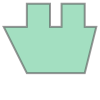

In [268]:
problems[2].room.polygon

In [269]:
len(problems[2].furniture)

120

In [270]:
plot(problems[1].room.polygon)

NameError: name 'plot' is not defined

In [5]:
sorted_shapes = []
for shape in problems[1].furniture:
    sorted_shapes.append((shape, shape.total_cost))

sorted_shapes = sorted(sorted_shapes, key = lambda x:x[1], reverse=True)

for (shape, cost) in sorted_shapes:
    print(cost)
    x,y = shape.polygon.exterior.xy
    print(x,y)
    plot(shape.polygon)

324.0
array('d', [0.0, 6.0, 3.0, 0.0]) array('d', [0.0, 0.0, 6.0, 0.0])


NameError: name 'plot' is not defined

In [ ]:
def insertRandomShape(room, shape):
    room_coordinates = list(zip(*room.exterior.xy))
    random_vertex = random.randint(0, len(room_coordinates) - 1)
    room_vertex = room_coordinates[random_vertex]
    shape_coordinates = list(zip(*shape.exterior.xy))

    room_coordinate_x = room_vertex[0]
    room_coordinate_y = room_vertex[1]

    def f(angle):
        return affinity.rotate(shape, angle, origin=(room_coordinate_x, room_coordinate_y)).difference(room).area

    for shape_coordinate_x, shape_coordinate_y in shape_coordinates:
        new_translated_shape = affinity.translate(shape, room_coordinate_x - shape_coordinate_x, room_coordinate_y - shape_coordinate_y)
        angle = np.float64(360) + optimize.minimize_scalar(f, bounds=(0,360), method='golden', options={'xtol': 1e-15}).x
        new_rotated_shape = affinity.rotate(new_translated_shape, angle, origin=(room_coordinate_x, room_coordinate_y))

        if (room.difference(new_rotated_shape).area == room.area - new_rotated_shape.area):
            new_updatable_room = Polygon()
            room_to_check = room.difference(new_rotated_shape)
            if (room_to_check.geom_type == 'MultiPolygon'):
                for poly in room_to_check:
                    new_updatable_room.union(poly)
            else:
                new_updatable_room = room_to_check

            if new_updatable_room.area > 0.00000000000000000000001:
                return (True, new_updatable_room, new_rotated_shape)
            else:
                continue
    return (False, room, shape)

def insertShape(room, shape, x, y):
    shape_coordinates = list(zip(*shape.exterior.xy))

    room_coordinate_x = x
    room_coordinate_y = y

    def f(angle):
        return affinity.rotate(shape, angle, origin=(room_coordinate_x, room_coordinate_y)).difference(room).area

    for shape_coordinate_x, shape_coordinate_y in shape_coordinates:
        new_translated_shape = affinity.translate(shape, room_coordinate_x - shape_coordinate_x, room_coordinate_y - shape_coordinate_y)
        angle = np.float64(360) + optimize.minimize_scalar(f, bounds=(0,360), method='golden', options={'xtol': 1e-15}).x
        new_rotated_shape = affinity.rotate(new_translated_shape, 0, origin=(room_coordinate_x, room_coordinate_y))

        if (room.difference(new_rotated_shape).area == room.area - new_rotated_shape.area):
            new_updatable_room = Polygon()
            room_to_check = room.difference(new_rotated_shape)
            if (room_to_check.geom_type == 'MultiPolygon'):
                for poly in room_to_check:
                    new_updatable_room.union(poly)
            else:
                new_updatable_room = room_to_check

            if new_updatable_room.area > 0.00000000000000000000001:
                return (True, new_updatable_room, new_rotated_shape)
            else:
                continue
    return (False, room, shape)

def algorithm(problem):
    updatable_room = problem.room.polygon
    shapes = problem.furniture

    solution = []
    solution_shapes = []

    sorted_shapes = []
    for shape in shapes:
        sorted_shapes.append((shape, shape.total_cost))

    sorted_shapes = sorted(sorted_shapes, key = lambda x:x[1], reverse=True)

    for shape, d in sorted_shapes:
        for (x,y) in list(zip(*updatable_room.exterior.xy)):
            (isInserted, updatable_room, updated_shape) = insertShape(updatable_room, shape.polygon, x, y)
            if isInserted:
                    x, y = updated_shape.exterior.xy
                    solution_shapes.append(shape)
                    solution.append(list(zip(*(x,y))))
                    print(1 - updatable_room.area / problem.room.polygon.area)
                    sorted_shapes.remove((shape, d))
                    plt.plot(updatable_room.exterior.xy[0], updatable_room.exterior.xy[1], color='#6699cc', alpha=0.7, linewidth=3, solid_capstyle='round', zorder=2)
                    plt.plot(x, y, color='#e50000', alpha=0.7, linewidth=3, solid_capstyle='round', zorder=2)
                    display.display(plt.gcf())
                    display.display(plt.clf())
                    display.clear_output(wait=True)
                    time.sleep(0.0001)
                    break
    
    for i in range(10):
        for shape, d in sorted_shapes:
            (tmpX, tmpY) = shape.polygon.exterior.xy
            if len(tmpX) == 4:
                (isInserted, updatable_room, updated_shape) = insertRandomShape(updatable_room, shape.polygon)
                if isInserted:
                    x, y = updated_shape.exterior.xy
                    solution_shapes.append(shape)
                    solution.append(list(zip(*(x,y))))
                    print(1 - updatable_room.area / problem.room.polygon.area)
                    sorted_shapes.remove((shape, d))
                    plt.plot(updatable_room.exterior.xy[0], updatable_room.exterior.xy[1], color='#6699cc', alpha=0.7, linewidth=3, solid_capstyle='round', zorder=2)
                    plt.plot(x, y, color='#e50000', alpha=0.7, linewidth=3, solid_capstyle='round', zorder=2)
                    display.display(plt.gcf())
                    display.display(plt.clf())
                    display.clear_output(wait=True)
                    time.sleep(0.0001)
     
    for i in range(100):
        for shape, d in sorted_shapes:
            x, y = shape.polygon.exterior.xy
            points = random_points_within(updatable_room, 1)[0]
            polygon = affinity.translate(shape.polygon, points.x, points.y)
            polygon = affinity.rotate(polygon, random.uniform(0, 180), origin="centroid")
            if updatable_room.contains(polygon):
                updatable_room = updatable_room.difference(polygon)
                x, y = polygon.exterior.xy
                solution_shapes.append(shape)
                solution.append(list(zip(*(x, y))))
                sorted_shapes.remove((shape, d))
                print(1 - updatable_room.area / problem.room.polygon.area)
                plt.plot(updatable_room.exterior.xy[0], updatable_room.exterior.xy[1], color='#6699cc', alpha=0.7, linewidth=3, solid_capstyle='round', zorder=2)
                plt.plot(x, y, color='#e50000', alpha=0.7, linewidth=3, solid_capstyle='round', zorder=2)
                display.display(plt.gcf())
                display.display(plt.clf())
                display.clear_output(wait=True)
                time.sleep(0.0001)


    test_room = updatable_room
    print("Area coverage: " + str(1 - (updatable_room.area / problem.room.polygon.area)))
    return (solution, solution_shapes)

def get_output(solution):
    output = ""
    for x in solution:
        output = output + str(x[:-1]).replace('[','').replace(']','') + "; "
    return output

def get_cost(solution_shapes):
    total_cost = 0
    for shape in solution_shapes:
        total_cost = total_cost + shape.total_cost
    return total_cost

i = 4
(solution, solution_shapes) = algorithm(problems[i-1])
print("Problem" + str(i))
print(get_output(solution))
print(get_cost(solution_shapes))


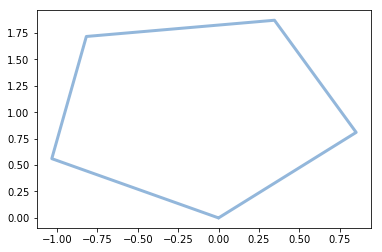

In [357]:
def newPlot(poly):
    x,y = poly.exterior.xy
    plt.plot(x, y, color='#6699cc', alpha=0.7, linewidth=3, solid_capstyle='round', zorder=2)
    time.sleep(1)
    

newPlot(problems[3].room.polygon)
#newPlot(Polygon([(0.0,0.0), (3.0, 6.0), (6.0, 0.0)]))
#newPlot(Polygon([(6, 0.0), (11, 0.0), (6, 5.0)]))


In [1]:
sorted_shapes = []
for shape in problems[20].furniture:
    sorted_shapes.append((shape, shape.total_cost))

sorted_shapes = sorted(sorted_shapes, key = lambda x:x[1], reverse=True)

for (shape, cost) in sorted_shapes:
#     if (shape.polygon.area == 26):
#         x,y = shape.polygon.exterior.xy
#         print(x,y)
    print(cost)
    print(shape.polygon.area)
    x,y = shape.polygon.exterior.xy
    print(x,y)
    newPlot(shape.polygon)

NameError: name 'problems' is not defined

In [ ]:
room_coords = list(zip(*problems[6].room.polygon.exterior.xy))
for i in range(1,len(room_coords)):
    print((np.sqrt((room_coords[i][0]-room_coords[i-1][0])**2+(room_coords[i][1]-room_coords[i-1][1])**2)))

In [ ]:
for item in problems[6].furniture:
    item_coords = list(zip(*item.polygon.exterior.xy))
    for i in range(1,len(item_coords)):
            print((np.sqrt((item_coords[i][0]-item_coords[i-1][0])**2+(item_coords[i][1]-item_coords[i-1][1])**2)))

In [435]:
our_room = problems[9].room.polygon
our_list = list(zip(*our_room.exterior.xy))[:-1]
new_list = []
vectors = []

In [436]:
for i, j, k in zip(range(0, len(our_list)), range(0, len(our_list)), range(0, len(our_list))):
    j = (j+1) % len(our_list)
    k = (k+2) % len(our_list)
    new_list.append((our_list[i], our_list[j], our_list[k]))
    #print(our_list[i], our_list[j], our_list[k])

In [437]:
vectors = []
for i, j, k in new_list:
    a = np.subtract(i,j)
    b = np.subtract(k,j)
    c = np.add(a, b)
    d = np.add(j, c)
    new_d = (d[0], d[1])
    vectors.append((i, j, k, new_d))

In [438]:
sorted_room_shapes = []
for vector in vectors:
    poly = Polygon(vector)
    sorted_room_shapes.append((poly, np.round(poly.area)))
    #print(Polygon(vector).area)
sorted_room_shapes = sorted(sorted_room_shapes, key = lambda x:x[1], reverse=True)

In [439]:
sorted_shapes = []
for shape in problems[9].furniture:
    sorted_shapes.append((shape, np.round(shape.polygon.area)))
sorted_shapes = sorted(sorted_shapes, key = lambda x:x[1], reverse=True)

In [440]:
d_sorted_room_shapes = {k: v for v, k in sorted_room_shapes}
d_room_shapes = {k: v for v, k in sorted_shapes}

In [441]:
final_solution = [(d_sorted_room_shapes[k],d_room_shapes[k]) for k in d_sorted_room_shapes.keys()&d_room_shapes.keys()]

In [442]:
for item in final_solution:
    print(item[1].total_cost)
    print(list(zip(*item[0].exterior.xy)))
    #print(list(zip(*item[1].polygon.exterior.xy)))
    pl

0.3125
[(2.830742069885416, -2.8699998839339393), (2.5860840267503074, -3.3726353800235978), (3.5317678824470544, -2.9625353372602072), (3.776425925582163, -2.459899841170549), (2.830742069885416, -2.8699998839339393)]
1.0
[(-0.7935612658879052, -0.6084903592353664), (0.0, 0.0), (-0.6084903592353665, 0.7935612658879052), (-1.4020516251232717, 0.18507090665253878), (-0.7935612658879052, -0.6084903592353664)]
3.25
[(3.5317678824470544, -2.9625353372602072), (2.0105419843586385, -0.9786321725404441), (2.8041032502465435, -0.37014181330507784), (4.325329148334959, -2.3540449780248407), (3.5317678824470544, -2.9625353372602072)]
9.0
[(2.195612891011177, 0.4234194525828279), (-0.18507090665253884, -1.4020516251232717), (-0.7935612658879052, -0.6084903592353664), (1.5871225317758106, 1.2169807184707333), (2.195612891011177, 0.4234194525828279)]


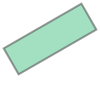

In [351]:
shape_to_insert = Polygon([(37.77503648527127, -25.574335153360764), (35.28274962119413, -21.239764103401097), (22.279036471315095, -28.71662469563252), (24.77132333539224, -33.05119574559219)])
shape_to_insert

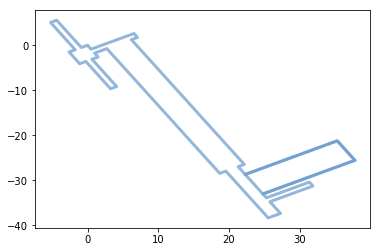

In [359]:
newPlot(shape_to_insert)
newPlot(room_16)
plt.show()

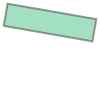

In [418]:
Polygon([(-0.7652382894382784, 7.239779717669425), (-8.645832191711866, 8.61681993038956), (-8.9900922448919, 6.646671454821163), (-1.109498342618312, 5.269631242101028)])